In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/housing-data.csv

--2019-03-28 13:27:47--  https://storage.googleapis.com/nicksdemobucket/housing-data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [application/octet-stream]
Saving to: ‘housing-data.csv’

housing-data.csv    100%[===================>]     816  --.-KB/s    in 0s      

2019-03-28 13:27:47 (16.2 MB/s) - ‘housing-data.csv’ saved [816/816]



In [0]:
import pandas as pd 
df = pd.read_csv('housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [0]:
features = df.drop(['price'],axis = 1).values
labels = df[['price']].values
print(features.shape,labels.shape)

(47, 3) (47, 1)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(12,activation = 'relu',input_shape=(3,)))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(1,activation = 'relu'))

model.compile(optimizer = 'adam',
              loss = 'MSE',
              metrics = ['mean_absolute_error'])

h = model.fit(features, labels, epochs=18, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 37 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/18
37/37 [==============================] - 0s 4ms/sample - loss: 136445361954.5946 - mean_absolute_error: 345542.2188 - val_loss: 111448293376.0000 - val_mean_absolute_error: 321086.3438
Epoch 2/18
37/37 [==============================] - 0s 219us/sample - loss: 136434936416.8649 - mean_absolute_error: 345529.0000 - val_loss: 111438766080.0000 - val_mean_absolute_error: 321073.0312
Epoch 3/18
37/37 [==============================] - 0s 198us/sample - loss: 136424763281.2973 - mean_absolute_error: 345515.8438 - val_loss: 111429107712.0000 - val_mean_absolute_error: 321059.5000
Epoch 4/18
37/37 [==============================] - 0s 232us/sample - loss: 136413932793.0811 - mean_absolute_error: 345502.0938 - val_loss: 111419260928.0000 - val_mean_absolute_error: 321045.718

In [0]:
h.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

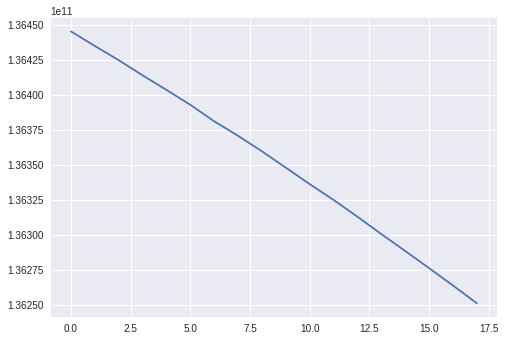

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])